In [17]:
from keras.datasets import cifar10
from keras.datasets import mnist
from keras.utils import to_categorical

In [18]:
(train_images, train_labels),(test_images,test_labels) = cifar10.load_data()

In [19]:
print(len(train_images))
print(len(test_images))
print(train_images[0].shape)

50000
10000
(32, 32, 3)


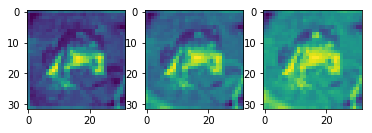

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
_, axarr = plt.subplots(1,3)
axarr[0].imshow(train_images[0,:,:,2])
axarr[1].imshow(train_images[0,:,:,1])
axarr[2].imshow(train_images[0,:,:,0])

In [22]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), padding="same",activation='relu',input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,(3,3), padding="same", activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64,(3,3), padding="same", activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,(3,3), padding="same", activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128,(3,3), padding="same", activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(3,3),padding="same", activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation="softmax"))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [24]:
from sklearn.model_selection import train_test_split
train_images_split,validation_images,train_labels_split,validation_labels = train_test_split(train_images,train_labels,test_size=0.2)

In [25]:
train_labels_categorical = to_categorical(train_labels_split)
validation_labels_categorical = to_categorical(validation_labels)
test_labels_categorical = to_categorical(test_labels)

In [26]:
from keras.preprocessing.image import ImageDataGenerator

dataAugmentor_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=15,
    width_shift_range = 0.1,
    height_shift_range= 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

dataAugmentor_validation = ImageDataGenerator(
    rescale = 1./255,
)


In [27]:
dataGenTrain = dataAugmentor_train.flow(
    x=train_images_split,
    y=train_labels_categorical,
    batch_size = 64
)

dataGenValidation = dataAugmentor_validation.flow(
    x=validation_images,
    y=validation_labels_categorical,
    batch_size = 64
)

In [28]:
from keras import optimizers
opt = optimizers.RMSprop(lr=0.001)
model.compile(
  loss="categorical_crossentropy",
  optimizer=opt,
  metrics=['acc']
)


In [29]:
from math import ceil
steps_per_epoch = ceil(len(train_images_split)/64)

validation_steps = ceil(len(validation_images)/64)

history = model.fit_generator(
  dataGenTrain,
  steps_per_epoch,
  epochs=45,
  validation_data = dataGenValidation,
  validation_steps = validation_steps
)

Epoch 1/45
625/625 [==============================] - 493s 789ms/step - loss: 1.7872 - acc: 0.3704 - val_loss: 1.6889 - val_acc: 0.4180
Epoch 2/45
625/625 [==============================] - 450s 719ms/step - loss: 1.3771 - acc: 0.5035 - val_loss: 1.2245 - val_acc: 0.5557
Epoch 3/45
625/625 [==============================] - 472s 755ms/step - loss: 1.2269 - acc: 0.5638 - val_loss: 1.2303 - val_acc: 0.5857
Epoch 4/45
625/625 [==============================] - 556s 890ms/step - loss: 1.1352 - acc: 0.5963 - val_loss: 1.1177 - val_acc: 0.6278
Epoch 5/45
625/625 [==============================] - 564s 902ms/step - loss: 1.0669 - acc: 0.6247 - val_loss: 1.1336 - val_acc: 0.6288
Epoch 6/45
625/625 [==============================] - 580s 927ms/step - loss: 1.0211 - acc: 0.6435 - val_loss: 1.0853 - val_acc: 0.6425
Epoch 7/45
625/625 [==============================] - 589s 943ms/step - loss: 0.9717 - acc: 0.6590 - val_loss: 0.9481 - val_acc: 0.6887
Epoch 8/45
625/625 [============================

In [30]:
model.save('Attempt_3_1.h5')

In [31]:
hist = history.history

acc = hist['acc']
val_acc = hist['val_acc']

loss = hist['loss']
val_loss = hist['val_loss']

epochs = range(1,len(acc)+1)

Train Accuracy: 
0.79505
Validation Acuracy: 
0.7403


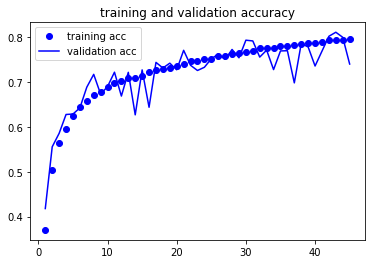

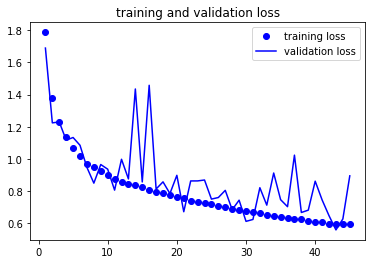

In [32]:
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

print("Train Accuracy: ")
print(hist['acc'][-1])
print("Validation Acuracy: ")
print(hist['val_acc'][-1])
plt.show()

In [33]:
loss, acc = model.evaluate(
    x=test_images/255.,
    y=test_labels_categorical
)

10000/10000 [==============================] - 34s 3ms/step


In [34]:
print("Loss: ")
print(loss)
print("Accuracy: ")
print(acc)

Loss: 
0.9138666347503662
Accuracy: 
0.7432


In [35]:
import numpy as np
import tensorflow as tf
from keras.models import load_model

model = load_model('Attempt_3_1.h5')

In [36]:
def get_examples(start,end,height = 10, width = 20):
    class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    numImages = np.arange(start,end)
    predictions = []
    categories = []
    for i in numImages:
        #prediction from model for first 5 images
        predictions.append(np.argmax(model.predict(x=test_images[i].reshape(1,32,32,3)/255.)))
        categories.append(class_names[predictions[-1]])

    #create subplots
    (f, axs) = plt.subplots(1, len(predictions), sharey=True)
    f.set_figheight(height)
    f.set_figwidth(width)

    guessNumber = 0
    for i in numImages:
        guess = categories[guessNumber]
        actual = class_names[test_labels[i][0]]
        actual = actual
        xpos = (10-len("Actual : "+ actual)/2)

        if(actual == guess):
            color = "green"
        else:
            color="red"

        axs[guessNumber].imshow(test_images[i])
        axs[guessNumber].set_title("Guess : " + categories[guessNumber],color=color)

        axs[guessNumber].text(xpos,40, "Actual : " + actual,color=color)
        guessNumber += 1
    f.show()

C:\Users\gabal\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


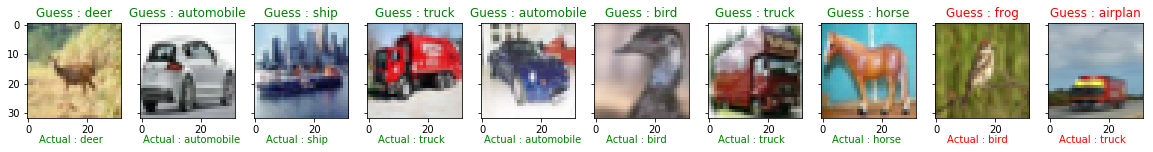

In [37]:
get_examples(130,140,20,20)
